### 1. 整体结构
CNN 中将卷积层的输出数据称为 特征图（feature map）。
### 2. 卷积层
### 卷积运算
如果将一个二维数据定义为 $I$，二维卷积核定义为 $K$，则

$$ S(i,j) = (I *K)(i,j) = \sum_m \sum_n I(i+m,j+n)K(m,n)$$

假设用（height, width）表示数据和卷积核的形状，则下图中输入数据尺寸是(5, 5)，输出数据尺寸是(3, 3)，卷积核尺寸是(3, 3)，其数值为

$$ \Bigg(
   \begin{matrix}
   0 & 1 & 2 \\
   2 & 2 & 0 \\
   0 & 1 & 2
  \end{matrix} \Bigg)
$$
令 $i$ 为输入数据尺寸，$k$ 为卷积核尺寸，$o$ 为输出数据尺寸，则有关系：

$$ o = (i - k) + 1 $$

### 填充（padding）
在进行卷积层的处理之前，有时要向输入数据的周围填入固定的数据（通常为 0），这称为**填充（padding）**. 
令 $p$ 为填充幅度，则有关系

$$ o = (i - k) + 2p + 1 $$

下图中的示例中，$i=5, k =4, p =2$，因此 $o=6$

### Same Padding
一类特殊的填充作为称之为 same padding，即使得输出数据尺寸等于输入数据尺寸。令卷积核尺寸 $k$ 为奇数（$k = 2n+1$），填充幅度 $p = \lfloor \frac{k}{2} \rfloor= n$，则有

$$ o = (i - 2n - 1)+2n+1 = i $$

下图中的示例中，$i=o=5, k = 3, p=1$

在这种情况下，只要硬件支持，网络就能包含任意多的卷积层，这是因为卷积运算不改变下一层的结构。然而，输入数据中靠近边界的部分相比于中间部分对于输出数据的影响更小。这可能会导致边界像素存在一定程度的欠表示。

### Full Padding
另一类特殊的填充作为称之为 full padding，即使卷积核与数据刚相交时开始做卷积，因此填充幅度 $p = k - 1$，

$$o = (i - k)+2(k-1)+1 = i+k-1$$
下图中的示例中，$i=5, k = 3, p=2$，因此 $o=6$

它进行了足够多的零填充，使得每个像素在每个方向上恰好被访问了 $k$ 次。

### 步幅
令 $i$ 为输入数据尺寸，$p$ 为填充幅度，$k$ 为卷积核尺寸，$s$ 为步幅大小，$o$ 为输出数据尺寸，则有：

$$ o = \lfloor \frac{i + 2p -k}{s} \rfloor + 1 $$

下图中的示例中，$i=5, k=3, s=2, p=1$，因此 $o=3$

### 三维数据的卷积运算
图像是三维数据，将其表示为多维数组时顺序为(channel, height, width)，例如通道数为 C、高度为 H、长度为 W 的数据的形状可以写成 $(C, H, W)$。在进行卷积运算时，除了高、宽方向之外还需要处理通道方向。通道方向上有多个特征图时，会按通道进行输入数据和卷积核的卷积运算，并将结果相加，从而得到输出。需要注意的是，输入数据和卷积核的通道数要为相同的值。

如果要在通道方向上也拥有多个卷积运算的输出，就需要用到多个卷积核。如下图所示，通过应用 $FN$ 个卷积核，输出特征图也生成了 $FN$ 个。如果将这 $FN$ 个特征图汇集在一起，就得到了形状为 $(FN, OH,OW)$ 的数据体。

### 批处理
之前的全连接神经网络的实现对应了批处理，通过批处理能够实现高效化的运算和学习时对应 mini-batch 的 SGD 算法。卷积运算也同样支持批处理。为此，需要将在各层间传递的数据保存为四维数据，按(batch_num, channel, height, width)的顺序保存数据。
### 卷积层的动机
卷积运算通过三个重要思想来帮助改进深度学习系统：**稀疏连接**（sparse connectivity）、**参数共享**（parameter sharing）、**等变表示**（equivariant representations）。

### 稀疏连接
传统的神经网络的全连接层使用矩阵乘法来建立输入与输出的连接关系。其中，参数矩阵中每一个单独的参数都描述了一个输入单元与一个输出单元间的交互。这意味着每一个输出单元与每一个输入单元都产生交互。然而，卷积网络具有稀疏连接（也叫作稀疏权重（sparse weights））的特征。这是通过使核的大小远小于输入数据大小来达到的。


例如，有 $m$ 个输入和 $n$ 个输出，那么全连接层的矩阵乘法需要 $m×n$ 个参数并且相应算法的时间复杂度为 $O(m×n)$。如果我们限制每一个输出拥有的连接数为 $k$，
那么稀疏的连接方法只需要 $k×n$ 个参数以及 $O(k×n)$ 的运行时间。在很多实际应用中，只需保持 $k$ 比 $m$ 小几个数量级，就能在机器学习的任务中取得好的表现。

下图中，灰色区域凸显了 $g_3$ 神经元以及它的**感受野**（receptive field）。
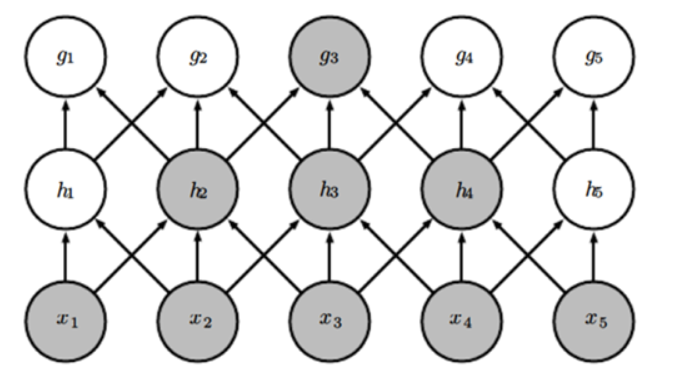

### 参数共享
参数共享是指在一个模型的多个函数中使用相同的参数。

在传统的神经网络中，当计算一层的输出时，权重矩阵的每一个元素只使用一次，当它乘以输入的一个元素后就再也不会用到了。

在卷积神经网络中，核的每一个元素都作用在输入的每一位置上。卷积运算中的参数共享保证了我们只需要学习一个参数集合，而不是对于每一位置都需要学习一个单独的参数集合。这虽然没有改变前向传播的运行时间（仍然是 $O(k×n)$），但它显著地把模型的存储需求降低至 $k$ 个参数，并且 $k$ 通常要比 $m$ 小很多个数量级。因此，卷积在存储需求和统计效率方面极大地优于稠密矩阵的乘法运算。

### 等变表示
参数共享的特殊形式使得神经网络层具有对**平移等变**（equivariance）的性质。如果一个函数满足输入改变，输出也以同样的方式改变这一性质，我们就说它是等变（equivariant）的。特别的是，如果函数 $f(x)$ 与 $g(x)$ 满足 $f(g(x))＝g(f(x))$，我们就说 $f(x)$ 对于变换 $g$ 具有等变性。对于卷积来说，如果令 $g$ 是输入的任意平移函数，那么卷积函数对于 $g$ 具有等变性。

例如，令 $I$ 表示图像在整数坐标上的亮度函数，$g$ 表示图像函数的变换函数使得 $I'＝g(I)$，其中图像函数 $I′$ 满足 $I′(x,y )＝I(x-1，y)$。这个函数把 $I$ 中的每个像素向右移动一个单位。如果我们先对 $I$ 进行这种变换然后进行卷积操作所得到的结果，与先对 $I$ 进行卷积然后再对输出使用平移函数 $g$ 得到的结果是一样的。

### 3. 池化层
池化函数使用某一位置的相邻输出的总体统计特征来代替网络在该位置的输出。例如，最大池化（Max Pooling）函数使用相邻矩形区域内的最大值。其它常用的池化函数包括相邻矩形区域内的平均值（Average Pooling）、L2范数以及基于距中心像素距离的加权平均函数。

一般来说，池化的窗口大小会和步幅设定成相同的值。下图是按步幅 2 进行2 × 2 的最大池化时的处理顺序。

池化层的特征

* 池化只是从目标区域中取最大值（或者平均值），所以不存在要学习的参数。
* 经过池化运算，输入数据和输出数据的通道数不会发生变化。
* 对微小的位置变化具有鲁棒性不管采用什么样的池化函数，当输入做出少量平移时，经过池化函数后的大多数输出并不会发生改变。

如果正常实现卷积运算，需要重复多层的 for 循环语句，但是存在使用 for 语句处理 NumPy 数组效率低下的缺点。这里，我们实现卷积运算不使用 for 语句，而是使用 im2col 这个便利的函数进行简单的实现。

**im2col**（image to column）函数将输入数据展开以适合卷积核（权重）。对三维的输入数据应用 im2col 后，数据被转换为二维矩阵. 

使用 im2col 展开输入数据后，只需将卷积层的卷积核（权重）纵向展开为 1 列，并计算这 2 个矩阵的乘积即可。

进一步考虑 batch 大小，令输入数据的形状为 $(N, C, H, W)$，卷积核的形状为 $(FN, C, FH, FW)$，输出数据的形状为 $(N, FN, OH, OW)$。im2col 函数返回的二维数据形状为 $(N \times OH \times OW, C \times FH \times FW)$，卷积核被展开为形状为 $(C \times FH \times FW, FN)$ 的 2 维数组，然后进行矩阵乘法运算，最后要将二维输出数据转换为合适的形状。

In [5]:
# im2col（image to column）函数将输入数据展开以适合卷积核（权重）。对三维的输入数据应用 im2col 后，数据被转换为二维矩阵. 
# 注意有错误!!!!!!!!!!!!!!!
def im2col(input_data, filter_h, filter_w, stride=1, pad=0):
    """
    Parameters
    ----------
    input_data : 由(数量, 通道, 高, 宽)的四维数组构成的输入数据
    filter_h : 卷积核的高
    filter_w : 卷积核的长
    stride : 步幅
    pad : 填充

    Returns
    -------
    col : 2维数组
    """
    N, C, H, W = input_data.shape
    out_h = (H + 2*pad - filter_h)//stride + 1
    out_w = (W + 2*pad - filter_w)//stride + 1

    img = np.pad(input_data, [(0,0), (0,0), (pad, pad), (pad, pad)], 'constant') # 使用 np.pad 对输入数据进行填充, 填充模式：constant（通常填充0）。
    col = np.zeros((N, C, out_h, out_w, filter_h, filter_w))

    for y in range(filter_h):
        y_max = y + stride*out_h
        for x in range(filter_w):
            x_max = x + stride*out_w
            col[:, :, :, :, y, x] = img[:, :, y:y_max:stride, x:x_max:stride]
    # 这个for循环截取下来被乘上卷积层的那些像素(以最后一个块的起始为终点,), 如果步幅不为一, 则可能最后一个块之后还有一些像素, 它们将会被舍去.
    
    col = col.transpose(0, 2, 3, 1, 4, 5).reshape(N*out_h*out_w, -1)
    return col

在卷积核的应用区域重叠的情况下，使用 im2col 函数展开后，展开后的元素个数会多于原方块的元素个数。因此，使用 im2col 的实现存在比普通的实现消耗更多内存的缺点。

接下来使用 im2col 来实现卷积层，这里我们将卷积层实现为名为 Convolution 的类。

In [4]:
class Convolution:
    def __init__(self, W, b, stride=1, pad=0):
        self.W = W
        self.b = b  # 偏置
        self.stride = stride
        self.pad = pad

    def forward(self, x):
        FN, C, FH, FW = self.W.shape
        N, C, H, W = x.shape
        out_h = (H + 2*self.pad - FH)// self.stride + 1
        out_w = (W + 2*self.pad - FW)// self.stride + 1

        col = im2col(x, FH, FW, self.stride, self.pad)
        col_W = self.W.reshape(FN, -1).T # 展开卷积核
        out = np.dot(col, col_W) + self.b

        out = out.reshape(N, out_h, out_w, -1).transpose(0, 3, 1, 2)
        # transpose():原始维度索引：(0=N, 1=C, 2=out_h, 3=out_w, 4=filter_h, 5=filter_w)。
        # 新维度顺序：(0=N, 2=out_h, 3=out_w, 1=C, 4=filter_h, 5=filter_w)
        return out

以上就是卷积层的前向传播 forward 处理的实现，通过使用 im2col 进行数据展开后，可以像实现全连接层一样来实现。在进行卷积层的反向传播时，必须进行im2col 的逆处理。具体的实现见 demo_code/layers.py 文件中的代码。

### 池化层的实现
最大池化层的实现按下面 3 个阶段进行：

* 展开输入数据
* 求各行的最大值
* 转换为合适的输出大小

池化层的 backward 处理可以参考 ReLU 层的实现中使用的 max 的反向传播，具体的实现见 demo_code/layers.py 文件中的代码。